In [12]:
import numpy as np
import pandas as pd
import matplotlib
import Core.mplFunctions as mpl
import matplotlib.pyplot as plt

In [5]:
x, y, z, E = np.loadtxt("/Users/Gonzalo/Downloads/VoxelEvent.txt", delimiter=",", unpack=True)

In [78]:
def make_movie(X, Y, Z, E, thrs=0.2):
#    matplotlib.rcParams['animation.writer'] = 'avconv'
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    xmin, xmax = np.nanmin(X), np.nanmax(X)
    ymin, ymax = np.nanmin(Y), np.nanmax(Y)
    zs = sorted(list(set(Z)))
    def init():
        global cbar, scplot
        ax.set_xlabel("x (mm)")
        ax.set_ylabel("y (mm)")
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((ymin, ymax))
        scplot = ax.scatter([], [], c=[])
        cbar = fig.colorbar(scplot, ax=ax)
        cbar.set_label("Charge (pes)")
        return (scplot,)

    def animate(i):
        global cbar, scplot
        selection = z == zs[i]
        x, y, e = X[selection], Y[selection], E[selection]
        selection = e > thrs * np.max(e)
        x, y, e = x[selection], y[selection], e[selection]
        cbar.remove()
        fig.clear()
        ax = plt.gca()
        ax.set_xlabel("x (mm)")
        ax.set_ylabel("y (mm)")
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((ymin, ymax))
        scplot = ax.scatter(x, y, c=e, marker="s", vmin=0, vmax=np.max(E))
#        scplot = ax.hist2d(x, y, weights=e, bins=220, range=((-220, 220), (-220, 220)))
        cbar = fig.colorbar(scplot, ax=ax, boundaries=np.linspace(0,np.max(E),100))
        cbar.set_label("Charge (pes)")
        return (scplot,)

    anim = matplotlib.animation.FuncAnimation(fig, animate, init_func=init,
                                              frames=len(zs), interval=200,
                                              blit=False)
    return anim

In [52]:
make_movie(x, y, z, E, 0.8)

In [53]:
E[z==max(z)]

array([   180.881,    576.639,    908.753,   1008.77 ,   1168.23 ,
         1350.83 ,   1357.3  ,   1295.57 ,    838.783,    264.415,
          571.269,   2178.33 ,   3661.21 ,   3961.18 ,   4243.14 ,
         4843.61 ,   5349.25 ,   5330.54 ,   3219.75 ,    847.745,
          887.439,   3619.47 ,   5121.23 ,   6481.61 ,   6581.07 ,
         7553.37 ,   8837.1  ,   7375.03 ,   5400.34 ,   1331.04 ,
          952.088,   3804.87 ,   6311.32 ,   6585.38 ,   7731.14 ,
         8820.62 ,   8926.   ,   9113.05 ,   5604.04 ,   1450.59 ,
         1009.67 ,   3728.51 ,   5872.91 ,   7128.17 ,   9439.28 ,
        10753.5  ,   9727.76 ,   8650.13 ,   5647.58 ,   1603.75 ,
         1003.42 ,   3669.35 ,   5784.17 ,   7062.13 ,   9499.97 ,
        11096.2  ,  10228.3  ,   9164.76 ,   5978.2  ,   1699.6  ,
          925.519,   3668.53 ,   6097.32 ,   6441.87 ,   7849.01 ,
         9504.87 ,  10016.5  ,  10374.9  ,   6373.41 ,   1651.82 ,
          855.383,   3477.33 ,   4923.44 ,   6315.92 ,   6711.

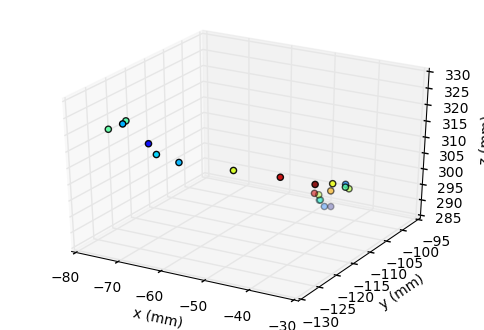

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cut = 7000
xb, yb, zb, eb = [], [], [], []
for zi in sorted(list(set(set(z)))):
    selection = E[z==zi] > 0.5*np.max(E[z==zi])
    xb += [np.average(x[z==zi][selection], weights=E[z==zi][selection])]
    yb += [np.average(y[z==zi][selection], weights=E[z==zi][selection])]
    zb += [zi]
    eb += [np.sum(E[z==zi][selection])]
ax.scatter(xb, yb, zs=zb, c=eb)#, linewidth=0)
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_zlabel("z (mm)")
plt.show()